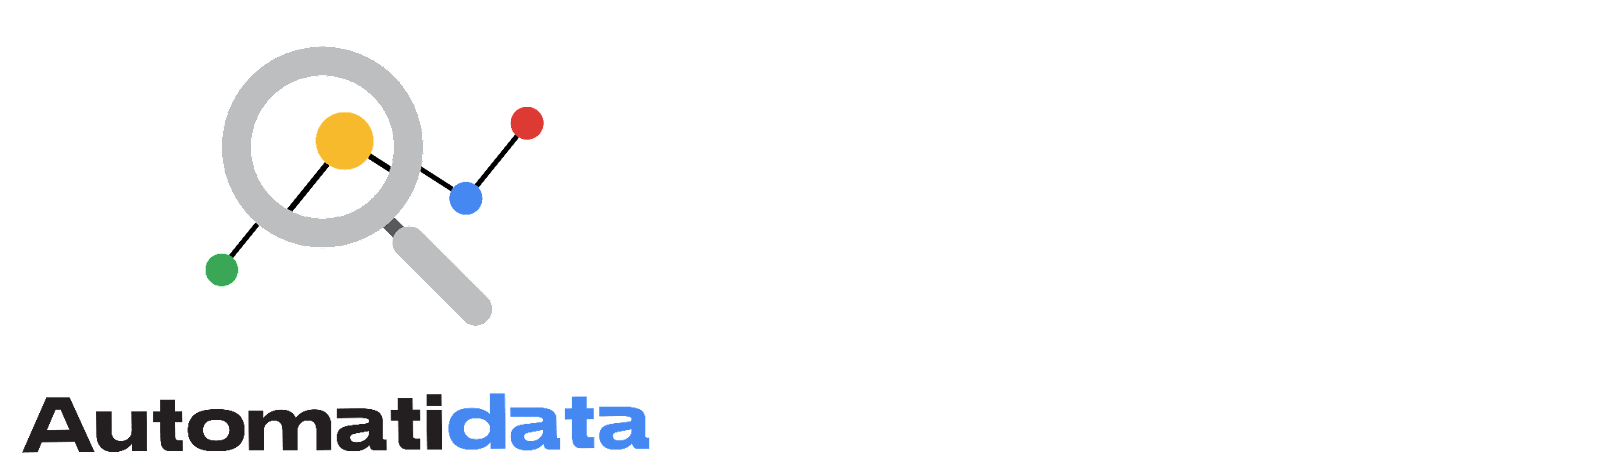

**FairFare: NYC TLC's Advanced Fare Estimation App by Automatidata**

**Project goal:**

In this fictional scenario, the New York City Taxi and Limousine Commission (TLC) has approached the data consulting firm Automatidata to develop an app that enables TLC riders to estimate the taxi fares in advance of their ride.

**Background:**

Since 1971, TLC has been regulating and overseeing the licensing of New York City's taxi cabs, for-hire vehicles, commuter vans, and paratransit vehicles.



**Scenario:**

You have received notice that the recently submitted New York City TLC project proposal has been approved. The Automatidata team now has access to the New York City TLC data to analyze, identify key variables, and prepare for exploratory data analysis.

**Course 2 tasks:**

1. Load data, explore, and extract the New York City TLC data with Python


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

In [ ]:
df=pd.read_csv('/content/2017_Yellow_Taxi_Trip_Data.csv')
df.head(1)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56


In [ ]:
df.shape

(22699, 18)

The dataset comprises 22,699 rows and 18 columns.

In [ ]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [ ]:
df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


The dataset contains no null values.

In [ ]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

Here's a brief summary of each column:


1. **Unnamed: 0**: An unnamed column that seems to be an index or identifier for each record. It is of 'int64' data type.

2. **VendorID**: The taxi service provider. It is of 'int64' data type.

3. **tpep_pickup_datetime**: Date and time when the taxi trip started. It is of 'object' data type.

4. **tpep_dropoff_datetime**: Date and time when the taxi trip ended. It is of 'object' data type.

5. **passenger_count**: Number of passengers in the taxi. It is of 'int64' data type.

6. **trip_distance**: The distance traveled during the taxi trip. It is of 'float64' data type.

7. **RatecodeID**: Code indicating the rate type. It is of 'int64' data type.

8. **store_and_fwd_flag**: A flag indicating whether the trip data was stored in the vehicle before being forwarded. It is of 'object' data type.

9. **PULocationID**: Pickup location. It is of 'int64' data type.

10. **DOLocationID**: Drop-off location. It is of 'int64' data type.

11. **payment_type**: Payment method used for the taxi trip. It is of 'int64' data type.

12. **fare_amount**: The base fare for the taxi trip. It is of 'float64' data type.
13. **extra**: Additional fees. It is of 'float64' data type.

14. **mta_tax**: Metropolitan Transportation Authority (MTA) tax. It is of 'float64' data type.

15. **tip_amount**: Tip amount given by the passenger. It is of 'float64' data type.

16. **tolls_amount**: Toll charges incurred during the trip. It is of 'float64' data type.

17. **improvement_surcharge**: Additional surcharge for improvements. It is of 'float64' data type.

18. **total_amount**: The total fare amount for the taxi trip, including all charges. It is of 'float64' data type.



2. Use custom functions to organize the information within the New York City TLC dataset



2. 1 Histograms:

Histograms for numeric variables like 'passenger_count', 'trip_distance', 'fare_amount', 'tip_amount'. To understand the distribution.

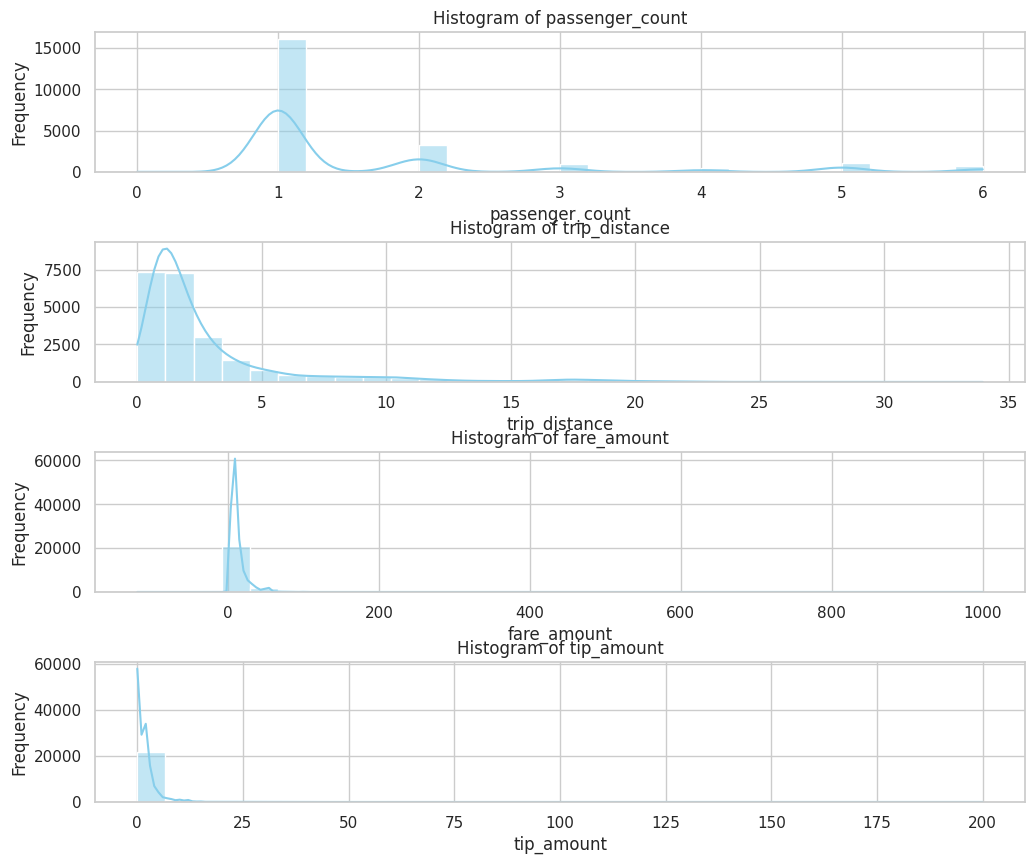

In [ ]:
# Specify numeric columns for which you want to create histograms
numeric_columns = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# Create histograms
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.show()


 2. 2 Box Plots:

Box plots for variables like 'passenger_count', 'trip_distance', 'payment_type',
'fare_amount','extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount'.To identify outliers and understand the spread of the data.

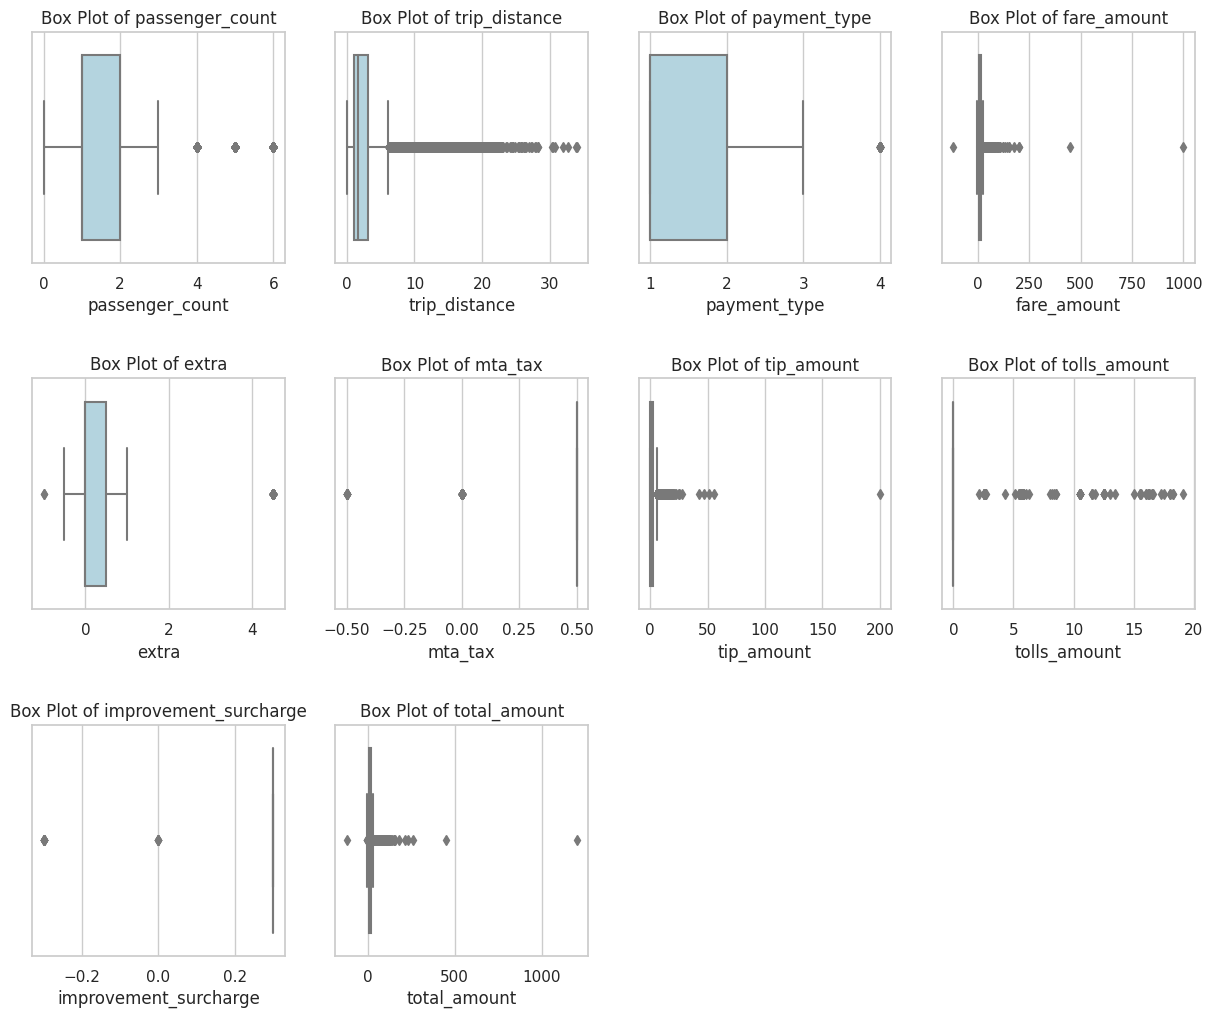

In [ ]:
# Specify numeric columns for which you want to create box plots
numeric_columns = ['passenger_count', 'trip_distance', 'payment_type',
       'fare_amount','extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount']

# Set up subplots in a 3x4 grid
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

# Flatten the 3x4 grid to iterate over axes
axes = axes.flatten()

# Create box plots
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

# Remove empty subplots if there are fewer than 9 numeric columns
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()


2. 3 Bar Charts:

Bar chart for 'payment_type' to show the distribution of payment methods.

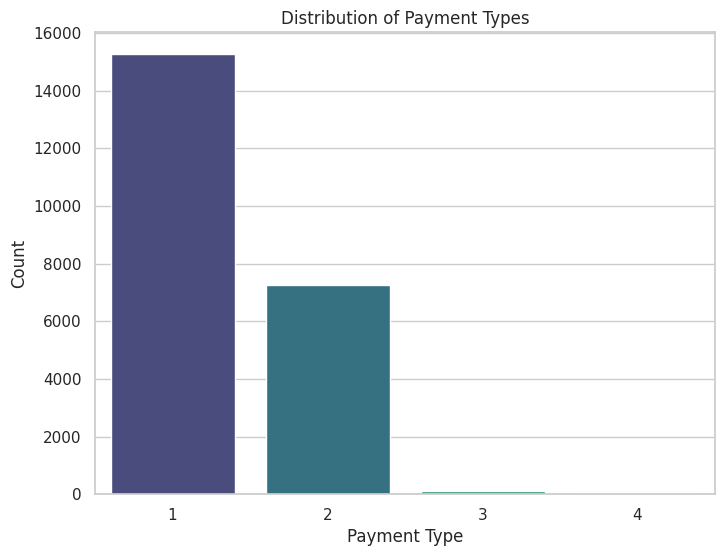

In [ ]:
# Count the occurrences of each payment type
payment_type_counts = df['payment_type'].value_counts()

# Set up the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette="viridis")

# Add labels and title
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')

plt.show()


2. 4 Scatter Plots:

Scatter plot for 'trip_distance' vs. 'fare_amount' and 'Trip Distance vs. Total Amount' to explore the relationship between these two variables.

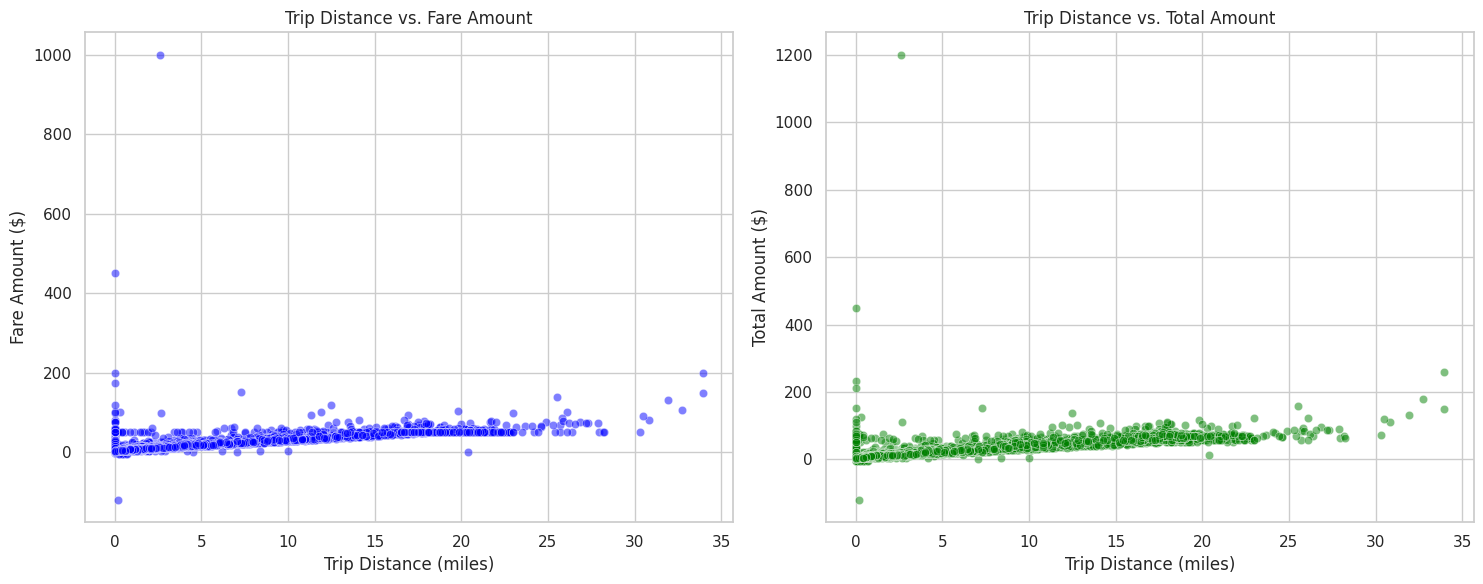

In [ ]:
# Set up a 1x2 subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot for 'trip_distance' vs. 'fare_amount'
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.5, color='blue', ax=axes[0])
axes[0].set_title('Trip Distance vs. Fare Amount')
axes[0].set_xlabel('Trip Distance (miles)')
axes[0].set_ylabel('Fare Amount ($)')

# Scatter plot for 'trip_distance' vs. 'total_amount'
sns.scatterplot(x='trip_distance', y='total_amount', data=df, alpha=0.5, color='green', ax=axes[1])
axes[1].set_title('Trip Distance vs. Total Amount')
axes[1].set_xlabel('Trip Distance (miles)')
axes[1].set_ylabel('Total Amount ($)')

# Adjust layout
plt.tight_layout()

plt.show()


2. 5 Correlation Heatmap:

A heatmap to visualize the correlation between numeric variables are 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount','passenger_count', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge'.

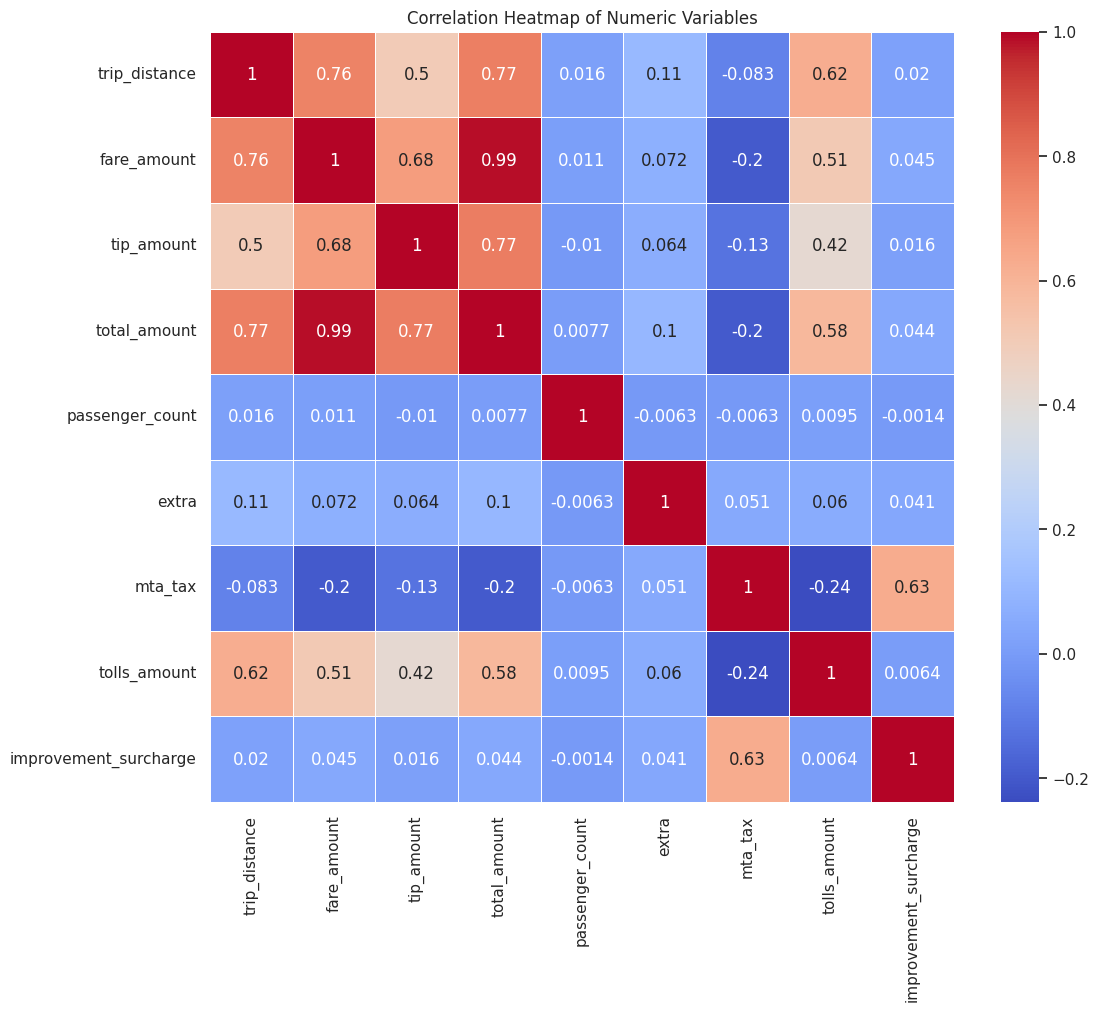

In [ ]:
# Select numeric columns for correlation analysis
numeric_columns = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'passenger_count', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge']

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Add title
plt.title('Correlation Heatmap of Numeric Variables')

plt.show()


2. 6 Pie Chart:

Pie chart for the distribution of 'RatecodeID' to understand the types of rides.


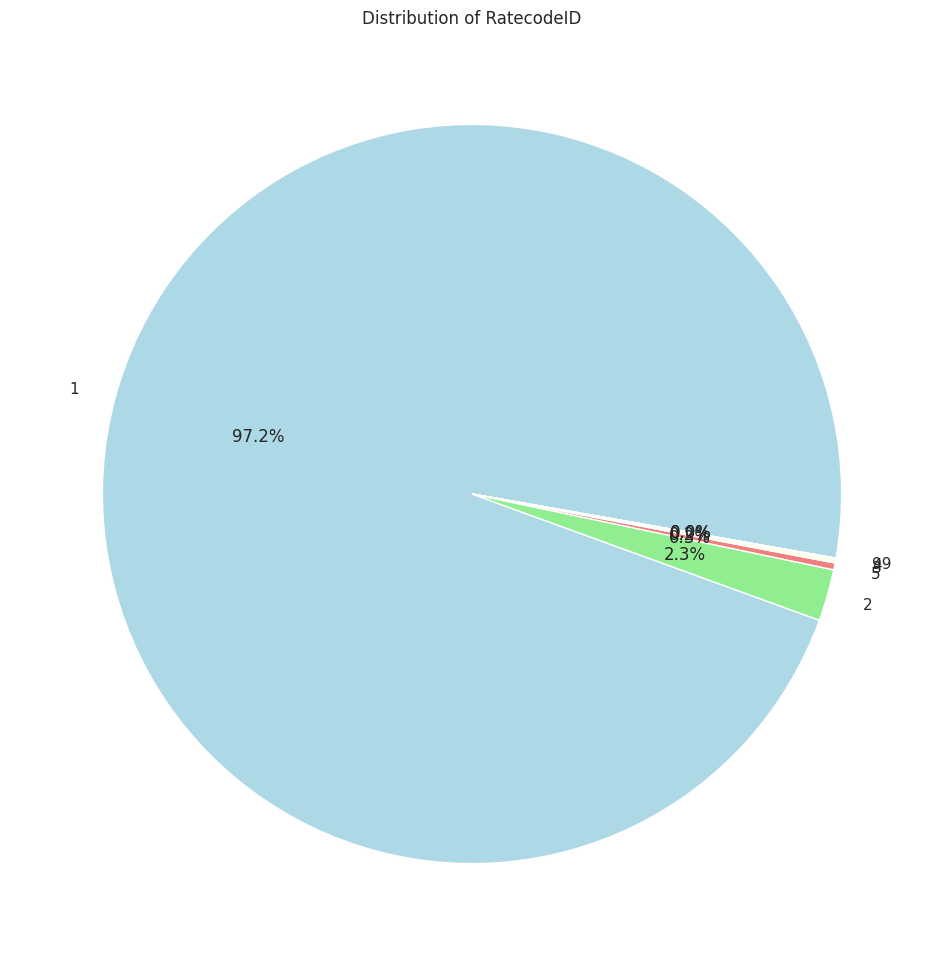

In [ ]:
# Count the occurrences of each RatecodeID
ratecode_counts = df['RatecodeID'].value_counts()

# Set up the pie chart
plt.figure(figsize=(12,12))
plt.pie(ratecode_counts, labels=ratecode_counts.index, autopct='%1.1f%%', startangle=350, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Distribution of RatecodeID')

plt.show()

2. 7 Violin Plots:

Violin plots for 'passenger_count', 'trip_distance', 'fare_amount', 'tip_amount'.To combine aspects of box plots and kernel density plots.

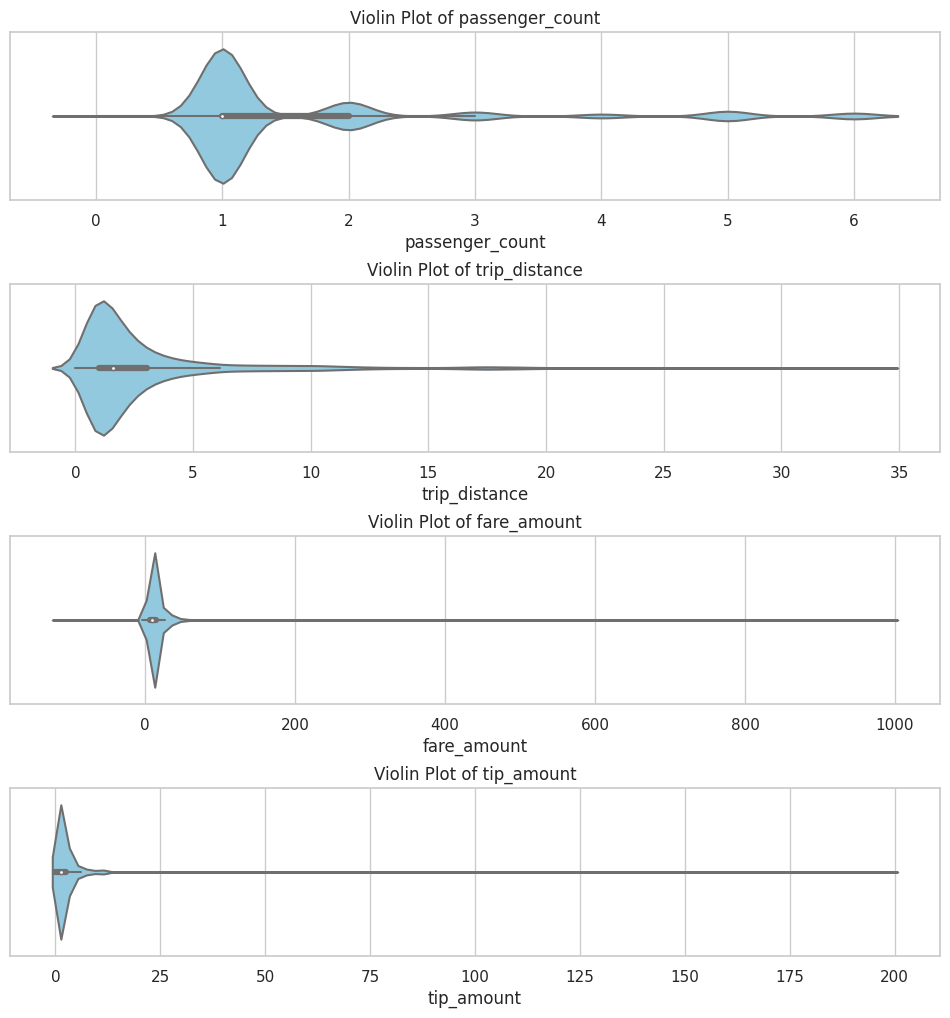

In [ ]:
# Specify numeric columns for which you want to create violin plots
numeric_columns = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(12, 3 * len(numeric_columns)))
fig.subplots_adjust(hspace=0.5)

# Create violin plots
for i, column in enumerate(numeric_columns):
    sns.violinplot(x=df[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Violin Plot of {column}')
    axes[i].set_xlabel(column)

plt.show()


2. 8 Comparison Plots:

Side-by-side bar charts for comparing average 'fare_amount' and 'tip_amount' between different 'RatecodeID' categories.

<ipython-input-214-8b166457433f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RatecodeID', y='fare_amount', data=df, ci=None, palette='Set2')


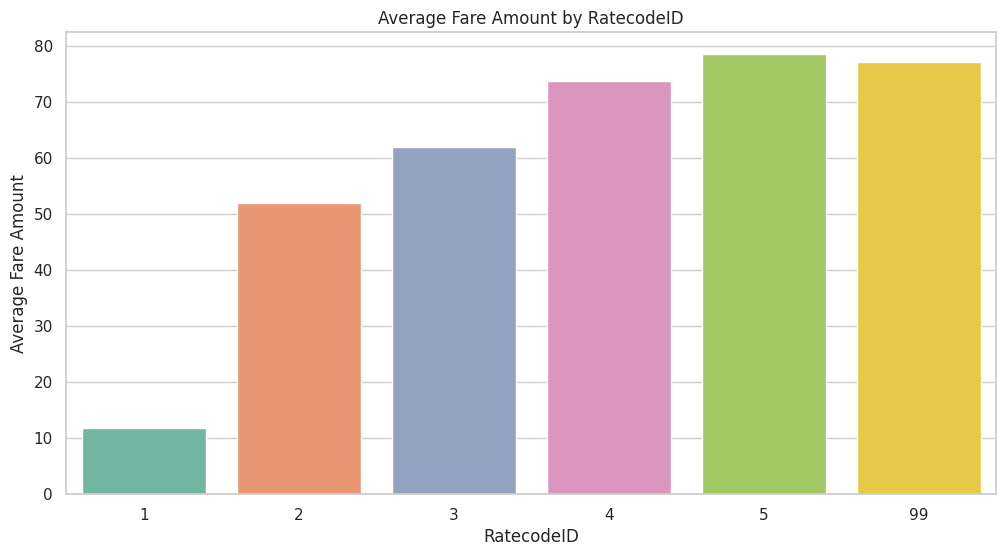

In [ ]:
# Set up the side-by-side bar chart for average fare amount
plt.figure(figsize=(12, 6))
sns.barplot(x='RatecodeID', y='fare_amount', data=df, ci=None, palette='Set2')

# Add labels and title
plt.title('Average Fare Amount by RatecodeID')
plt.xlabel('RatecodeID')
plt.ylabel('Average Fare Amount')

plt.show()


<ipython-input-215-4466e16e22c1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RatecodeID', y='tip_amount', data=df, ci=None, palette='Set2')


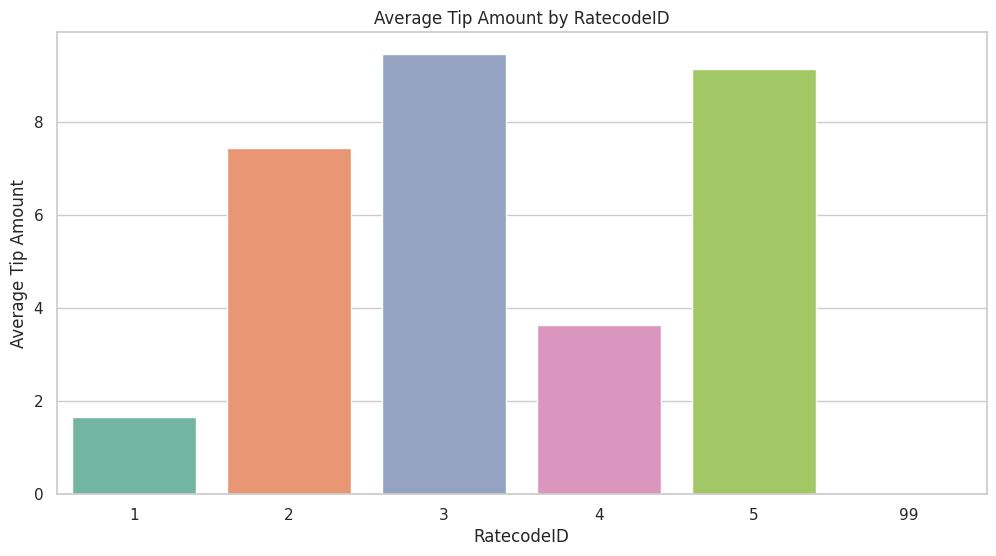

In [ ]:
# Set up the side-by-side bar chart for average tip amount
plt.figure(figsize=(12, 6))
sns.barplot(x='RatecodeID', y='tip_amount', data=df, ci=None, palette='Set2')

# Add labels and title
plt.title('Average Tip Amount by RatecodeID')
plt.xlabel('RatecodeID')
plt.ylabel('Average Tip Amount')

plt.show()


2. 9 Multivariate Scatter Plot:

Create a scatter plot matrix for selected numeric variables to explore relationships between multiple variables simultaneously.

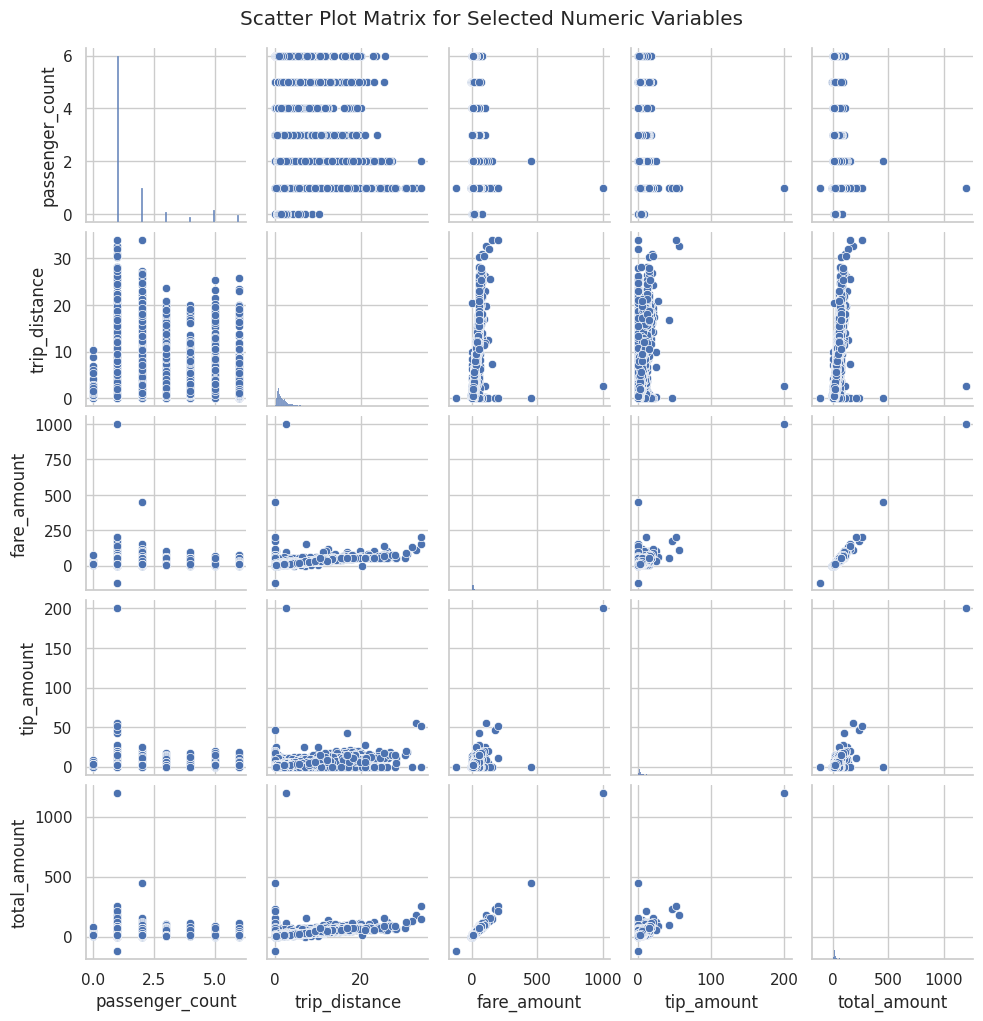

In [ ]:
# Select numeric variables for the scatter plot matrix
selected_vars = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount']

# Create a pair plot (scatter plot matrix)
sns.pairplot(df[selected_vars], height=2)
plt.suptitle('Scatter Plot Matrix for Selected Numeric Variables', y=1.02)

plt.show()


2. 10 Hexbin Plot for Density:

Utilize hexbin plots for 'trip_distance' and 'fare_amount' to visualize the density of rides within specific distance and fare ranges.

<Figure size 1200x800 with 0 Axes>

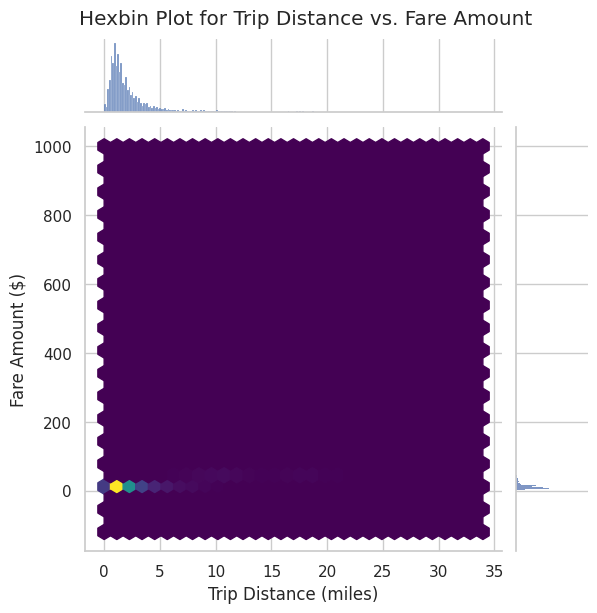

In [ ]:
# Set up the hexbin plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Hexbin plot for trip_distance and fare_amount
sns.jointplot(x='trip_distance', y='fare_amount', data=df, kind='hex', gridsize=30, cmap='viridis')

# Add labels and title
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.suptitle('Hexbin Plot for Trip Distance vs. Fare Amount', y=1.02)

plt.show()


2. 11 3D Plots:

Create 3D scatter plots for 'trip_distance', 'fare_amount', and 'tip_amount' to explore relationships in a three-dimensional space.

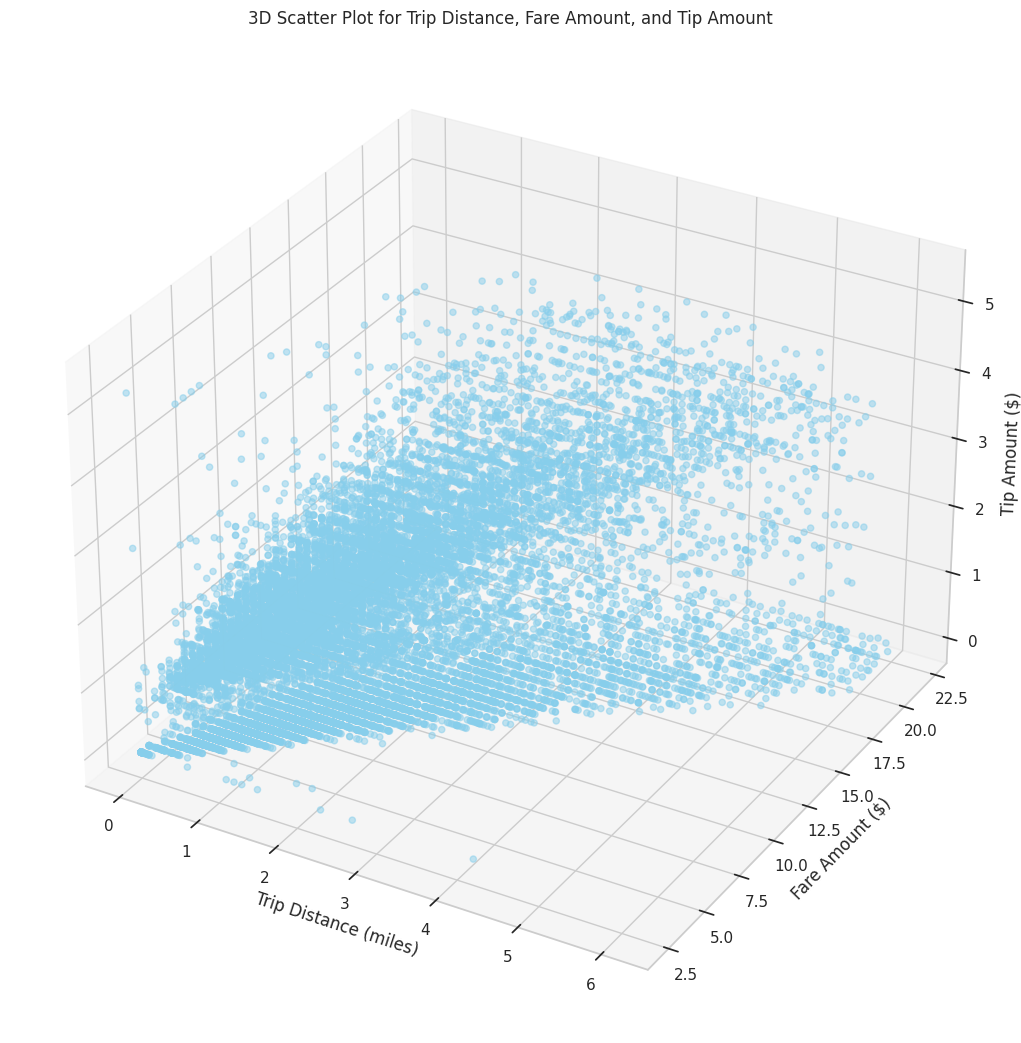

In [ ]:
# Set up the 3D scatter plot
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 'trip_distance', 'fare_amount', and 'tip_amount'
ax.scatter(df['trip_distance'], df['fare_amount'], df['tip_amount'], c='skyblue', marker='o', alpha=0.5)

# Add labels and title
ax.set_xlabel('Trip Distance (miles)')
ax.set_ylabel('Fare Amount ($)')
ax.set_zlabel('Tip Amount ($)')
ax.set_title('3D Scatter Plot for Trip Distance, Fare Amount, and Tip Amount')

plt.show()


3. Build a dataframe for the New York City TLC project


In [ ]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [ ]:
#Here the required column is selected
columns_to_drop = ['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime','RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID']

df=df.drop(columns_to_drop,axis=1)
df.head(2)

,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,6,3.34,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,1,1.80,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80


In [ ]:
df.columns

Index(['passenger_count', 'trip_distance', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

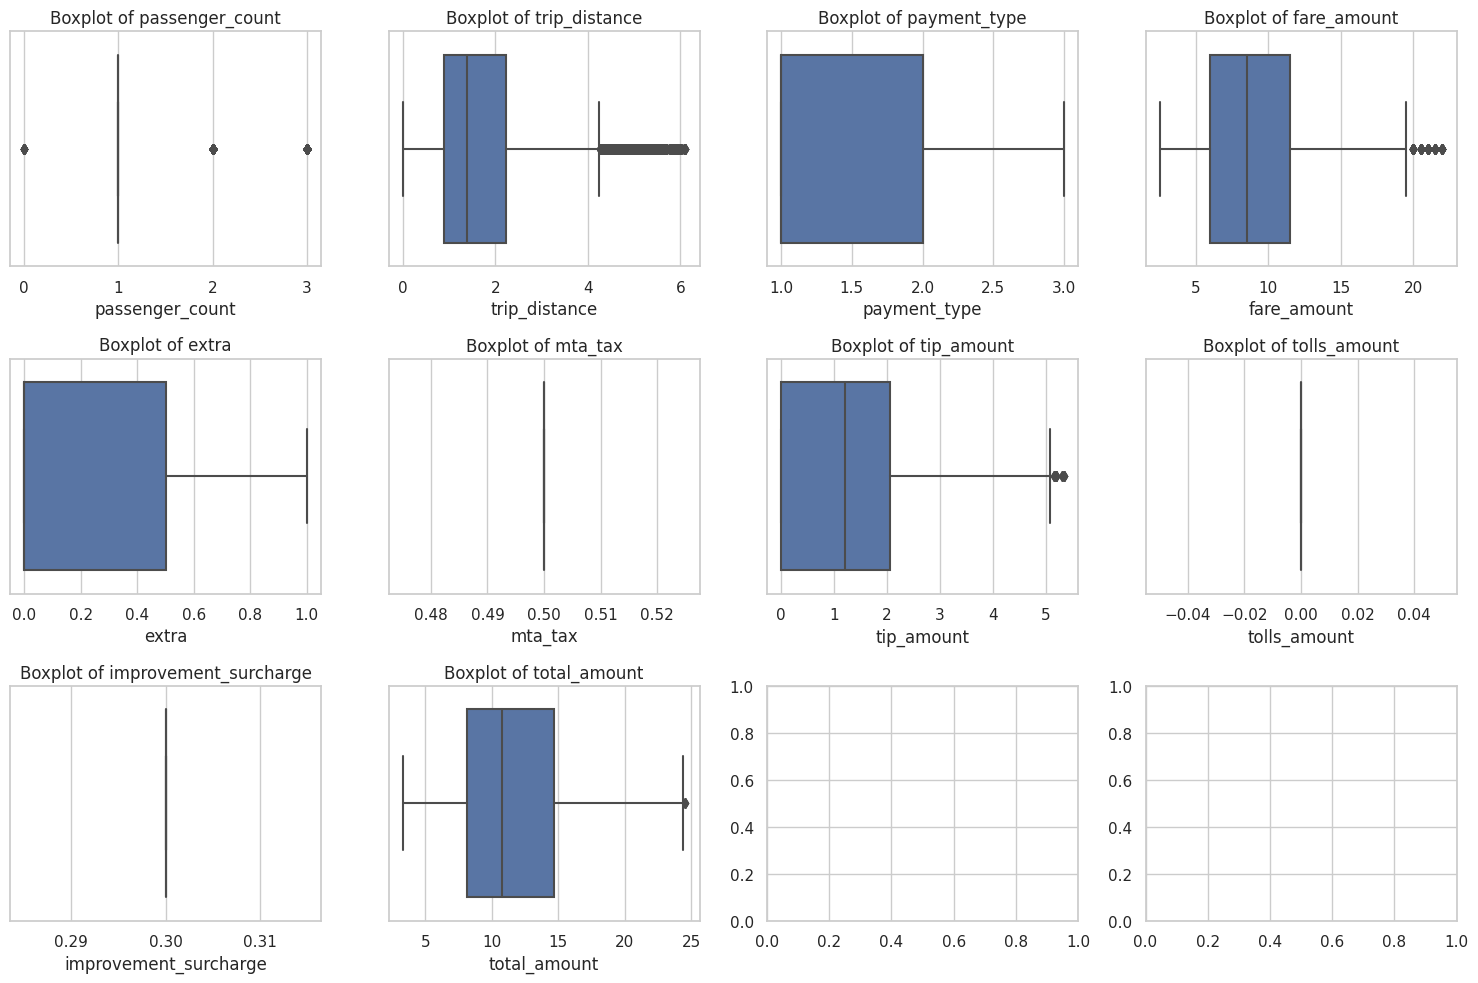

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Define the variables for boxplot
boxplot_vars = ['passenger_count', 'trip_distance', 'payment_type',
       'fare_amount','extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount']

# Remove outliers using the IQR method
for var in boxplot_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # Adjust the figure size if needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create boxplots for each variable and place them in the corresponding subplot
for i, var in enumerate(boxplot_vars):
    sns.boxplot(x=var, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()


Following the removal of outliers, the box plots are displayed.

In [ ]:
df.shape

(17303, 10)

Model

In [ ]:
# Select features and target
X = df[['passenger_count', 'trip_distance', 'payment_type',
       'fare_amount','extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge']]
y=df['total_amount']

Mean Absolute Error: 0.009608462910483161
Mean Squared Error: 0.019609592917210147
R-squared: 0.9990513941466919


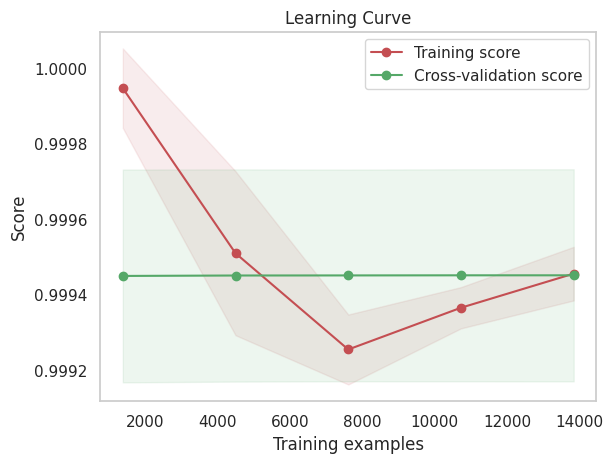

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('========================================')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print('========================================')

# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(model, "Learning Curve", X, y, cv=5, n_jobs=-1)
plt.show()


4. Create an executive summary for Automatidata

In Section 2.1, histograms are featured, showcasing a positively skewed distribution graph.

In Section 2.2, box plots are presented, revealing the presence of outliers.

In Section 2.3, Bar Charts illustrate the distribution of payment types. The chart categorizes payments into four types. Type '1' is the most popular, with an amount of 15,000. Type '2' follows as the second most popular, with an amount of 7,000. Type '3' is less popular, with an amount close to 100, while Type '4' is the least popular, with an amount close to 0.

In Section 2.4, Scatter plots depict the relationship between 'trip_distance' and 'fare_amount,' as well as 'Trip Distance' and 'Total Amount.' Both of these plots exhibit a positive correlation.

In Section 2.5, a well-constructed correlation heatmap is available for examination.

In Section 2.6, a Pie Chart is featured, highlighting that a significant portion, approximately 97.2%, is attributed to category '1.' The title of the Pie Chart is "Distribution of RatecodeID."

In Section 2. 7, a Violin Plot is showcased, depicting distributions for 'passenger_count,' 'trip_distance,' 'fare_amount,' and 'tip_amount.'

In Section 2. 8, two Comparison Plots are showcased, Side-by-side bar charts are utilized to compare the average 'fare_amount' and 'tip_amount' across various 'RatecodeID' categories.


In Section 2. 9, there is a Multivariate Scatter Plot featuring columns such as 'passenger_count,' 'trip_distance,' 'fare_amount,' 'tip_amount,' and 'total_amount.' Within this plot, certain scatter plots exhibit positive correlations, while others demonstrate indistinct relationships.

In Section 2. 10, a Hexbin Plot for Density is showcased, a purple graph with a horizontal axis labeled "Trip Distance (miles)" and a vertical axis labeled "Fare Amount ($)". The graph shows a linear relationship between the trip distance and the fare amount. The graph also includes a line of best fit, which further emphasizes the linear relationship between the two variables.

In Section 2. 11, a 3D visualization is presented, focusing on the columns 'trip_distance,' 'fare_amount,' and 'tip_amount.' This presentation offers a clear and precise visualization of the data.


Linear Regression was employed, the following performance:
#=========================================#

Mean Absolute Error: 0.009608462910483161

Mean Squared Error: 0.019609592917210147

R-squared: 0.9990513941466919

#=========================================#

These results indicate a highly favorable learning curve performance.